In [1]:
import numpy as np
import pandas as pd

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
!pip install statsmodels
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

In [5]:
data=pd.read_csv("Leads Report 2021 Numeric Data.csv",index_col='State wise scores of individual parameters').copy()

In [6]:
print(data.shape)
print(data.head())
print(data.dtypes)

(31, 22)
                                            Quality of Road Infrastructure  \
State wise scores of individual parameters                                   
Gujarat                                                               3.85   
Haryana                                                               3.68   
Punjab                                                                3.88   
TamilNadu                                                             3.68   
Maharashtra                                                           3.40   

                                            Quality of Rail Infrastructure  \
State wise scores of individual parameters                                   
Gujarat                                                               3.62   
Haryana                                                               3.67   
Punjab                                                                3.91   
TamilNadu                                             

In [7]:
#Checking null values
data.isna().sum()

Quality of Road Infrastructure                      0
Quality of Rail Infrastructure                      0
Quality of Multi-Modal Terminal Infrastructure      0
Quality of Unimodal Terminal Infrastructure         0
Quality ofWarehousing Infrastructure                0
Quality of Logistics Services                       0
Capability of Logistics Service Providers           0
Reasonableness of Road Freight Rates                0
Reasonableness of Prices of Terminal Services       0
Timeliness of Cargo Delivery (Transportation)       0
Timeliness of Cargo Delivery (Terminal Services)    0
Availability of Mobile/ Internet Connectivity       0
Safety and Security during Transportation           0
Safety and Security at Terminals                    0
Extent of Facilitation                              0
Ease of Obtaining all Approvals                     0
Efficiency of Regulatory                            0
Range scaled Ease of Doing Business ranks           0
Trade Infrastructure for Exp

In [8]:
#Statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quality of Road Infrastructure,31.0,3.041613,0.603374,1.93,2.550,3.07,3.495,3.88
Quality of Rail Infrastructure,31.0,2.881935,0.661521,1.50,2.295,3.02,3.355,3.91
Quality of Multi-Modal Terminal Infrastructure,31.0,2.917742,0.677828,1.53,2.420,3.13,3.430,3.98
Quality of Unimodal Terminal Infrastructure,31.0,2.822258,0.479678,1.94,2.500,2.92,3.185,3.63
Quality ofWarehousing Infrastructure,31.0,2.917742,0.542714,1.92,2.455,2.90,3.360,3.74
Quality of Logistics Services,31.0,3.041613,0.622613,1.87,2.640,3.23,3.530,3.89
Capability of Logistics Service Providers,31.0,3.105161,0.594849,1.78,2.705,3.38,3.515,3.87
Reasonableness of Road Freight Rates,31.0,2.156452,0.446964,1.27,1.830,2.25,2.495,2.78
Reasonableness of Prices of Terminal Services,31.0,2.239677,0.403745,1.43,1.930,2.35,2.580,2.75
Timeliness of Cargo Delivery (Transportation),31.0,3.016129,0.567678,1.87,2.650,3.18,3.480,3.70


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Gujarat to Chandigarh
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Quality of Road Infrastructure                    31 non-null     float64
 1   Quality of Rail Infrastructure                    31 non-null     float64
 2   Quality of Multi-Modal Terminal Infrastructure    31 non-null     float64
 3   Quality of Unimodal Terminal Infrastructure       31 non-null     float64
 4   Quality ofWarehousing Infrastructure              31 non-null     float64
 5   Quality of Logistics Services                     31 non-null     float64
 6   Capability of Logistics Service Providers         31 non-null     float64
 7   Reasonableness of Road Freight Rates              31 non-null     float64
 8   Reasonableness of Prices of Terminal Services     31 non-null     float64
 9   Timeliness of 

In [10]:
data['Final Score']

State wise scores of individual parameters
Gujarat             3.66
Haryana             3.52
Punjab              3.51
TamilNadu           3.36
Maharashtra         3.32
UttarPradesh        3.25
Odisha              3.20
Karnataka           3.18
AndhraPradesh       3.17
Telangana           3.14
Chhattisgarh        3.09
Jharkhand           3.09
Uttarakhand         3.06
Kerala              3.06
WestBengal          3.04
Rajasthan           2.96
MadhyaPradesh       2.90
Goa                 2.84
Bihar               2.77
HimachalPradesh     2.75
Assam               2.63
Jammu Kasmhir       2.64
Sikkim              2.63
Meghalaya           2.51
Tripura             2.50
ArunachalPradesh    2.43
Manipur             2.39
Mizoram             2.12
Nagaland            2.02
Delhi               3.35
Chandigarh          3.06
Name: Final Score, dtype: float64

In [11]:
data['Final Score'].value_counts()

3.06    3
2.63    2
3.09    2
3.66    1
2.84    1
2.02    1
2.12    1
2.39    1
2.43    1
2.50    1
2.51    1
2.64    1
2.75    1
2.77    1
2.96    1
2.90    1
3.52    1
3.04    1
3.14    1
3.17    1
3.18    1
3.20    1
3.25    1
3.32    1
3.36    1
3.51    1
3.35    1
Name: Final Score, dtype: int64

In [12]:
data.describe()

,Quality of Road Infrastructure,Quality of Rail Infrastructure,Quality of Multi-Modal Terminal Infrastructure,Quality of Unimodal Terminal Infrastructure,Quality ofWarehousing Infrastructure,Quality of Logistics Services,Capability of Logistics Service Providers,Reasonableness of Road Freight Rates,Reasonableness of Prices of Terminal Services,Timeliness of Cargo Delivery (Transportation),...,Safety and Security during Transportation,Safety and Security at Terminals,Extent of Facilitation,Ease of Obtaining all Approvals,Efficiency of Regulatory,Range scaled Ease of Doing Business ranks,Trade Infrastructure for Export Scheme outlay,States logistics enabling initiatives,Assessment of variables of logistics ease,Final Score
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,3.041613,2.881935,2.917742,2.822258,2.917742,3.041613,3.105161,2.156452,2.239677,3.016129,...,3.114516,3.277742,2.745484,2.739032,2.802258,2.548387,1.967742,3.225806,3.121613,2.940323
std,0.603374,0.661521,0.677828,0.479678,0.542714,0.622613,0.594849,0.446964,0.403745,0.567678,...,0.558031,0.513885,0.491500,0.496248,0.458095,1.501970,1.277599,1.257237,0.505260,0.404149
min,1.930000,1.500000,1.530000,1.940000,1.920000,1.870000,1.780000,1.270000,1.430000,1.870000,...,2.070000,2.000000,1.840000,1.820000,1.680000,1.000000,1.000000,1.000000,2.220000,2.020000
25%,2.550000,2.295000,2.420000,2.500000,2.455000,2.640000,2.705000,1.830000,1.930000,2.650000,...,2.610000,2.880000,2.305000,2.320000,2.455000,1.000000,1.000000,2.000000,2.670000,2.635000
50%,3.070000,3.020000,3.130000,2.920000,2.900000,3.230000,3.380000,2.250000,2.350000,3.180000,...,3.210000,3.410000,2.940000,2.940000,2.950000,2.000000,1.000000,3.000000,3.220000,3.060000
75%,3.495000,3.355000,3.430000,3.185000,3.360000,3.530000,3.515000,2.495000,2.580000,3.480000,...,3.610000,3.710000,3.175000,3.170000,3.185000,3.000000,3.000000,4.000000,3.500000,3.190000
max,3.880000,3.910000,3.980000,3.630000,3.740000,3.890000,3.870000,2.780000,2.750000,3.700000,...,3.880000,3.920000,3.410000,3.460000,3.380000,5.000000,5.000000,5.000000,3.890000,3.660000


<Axes: >

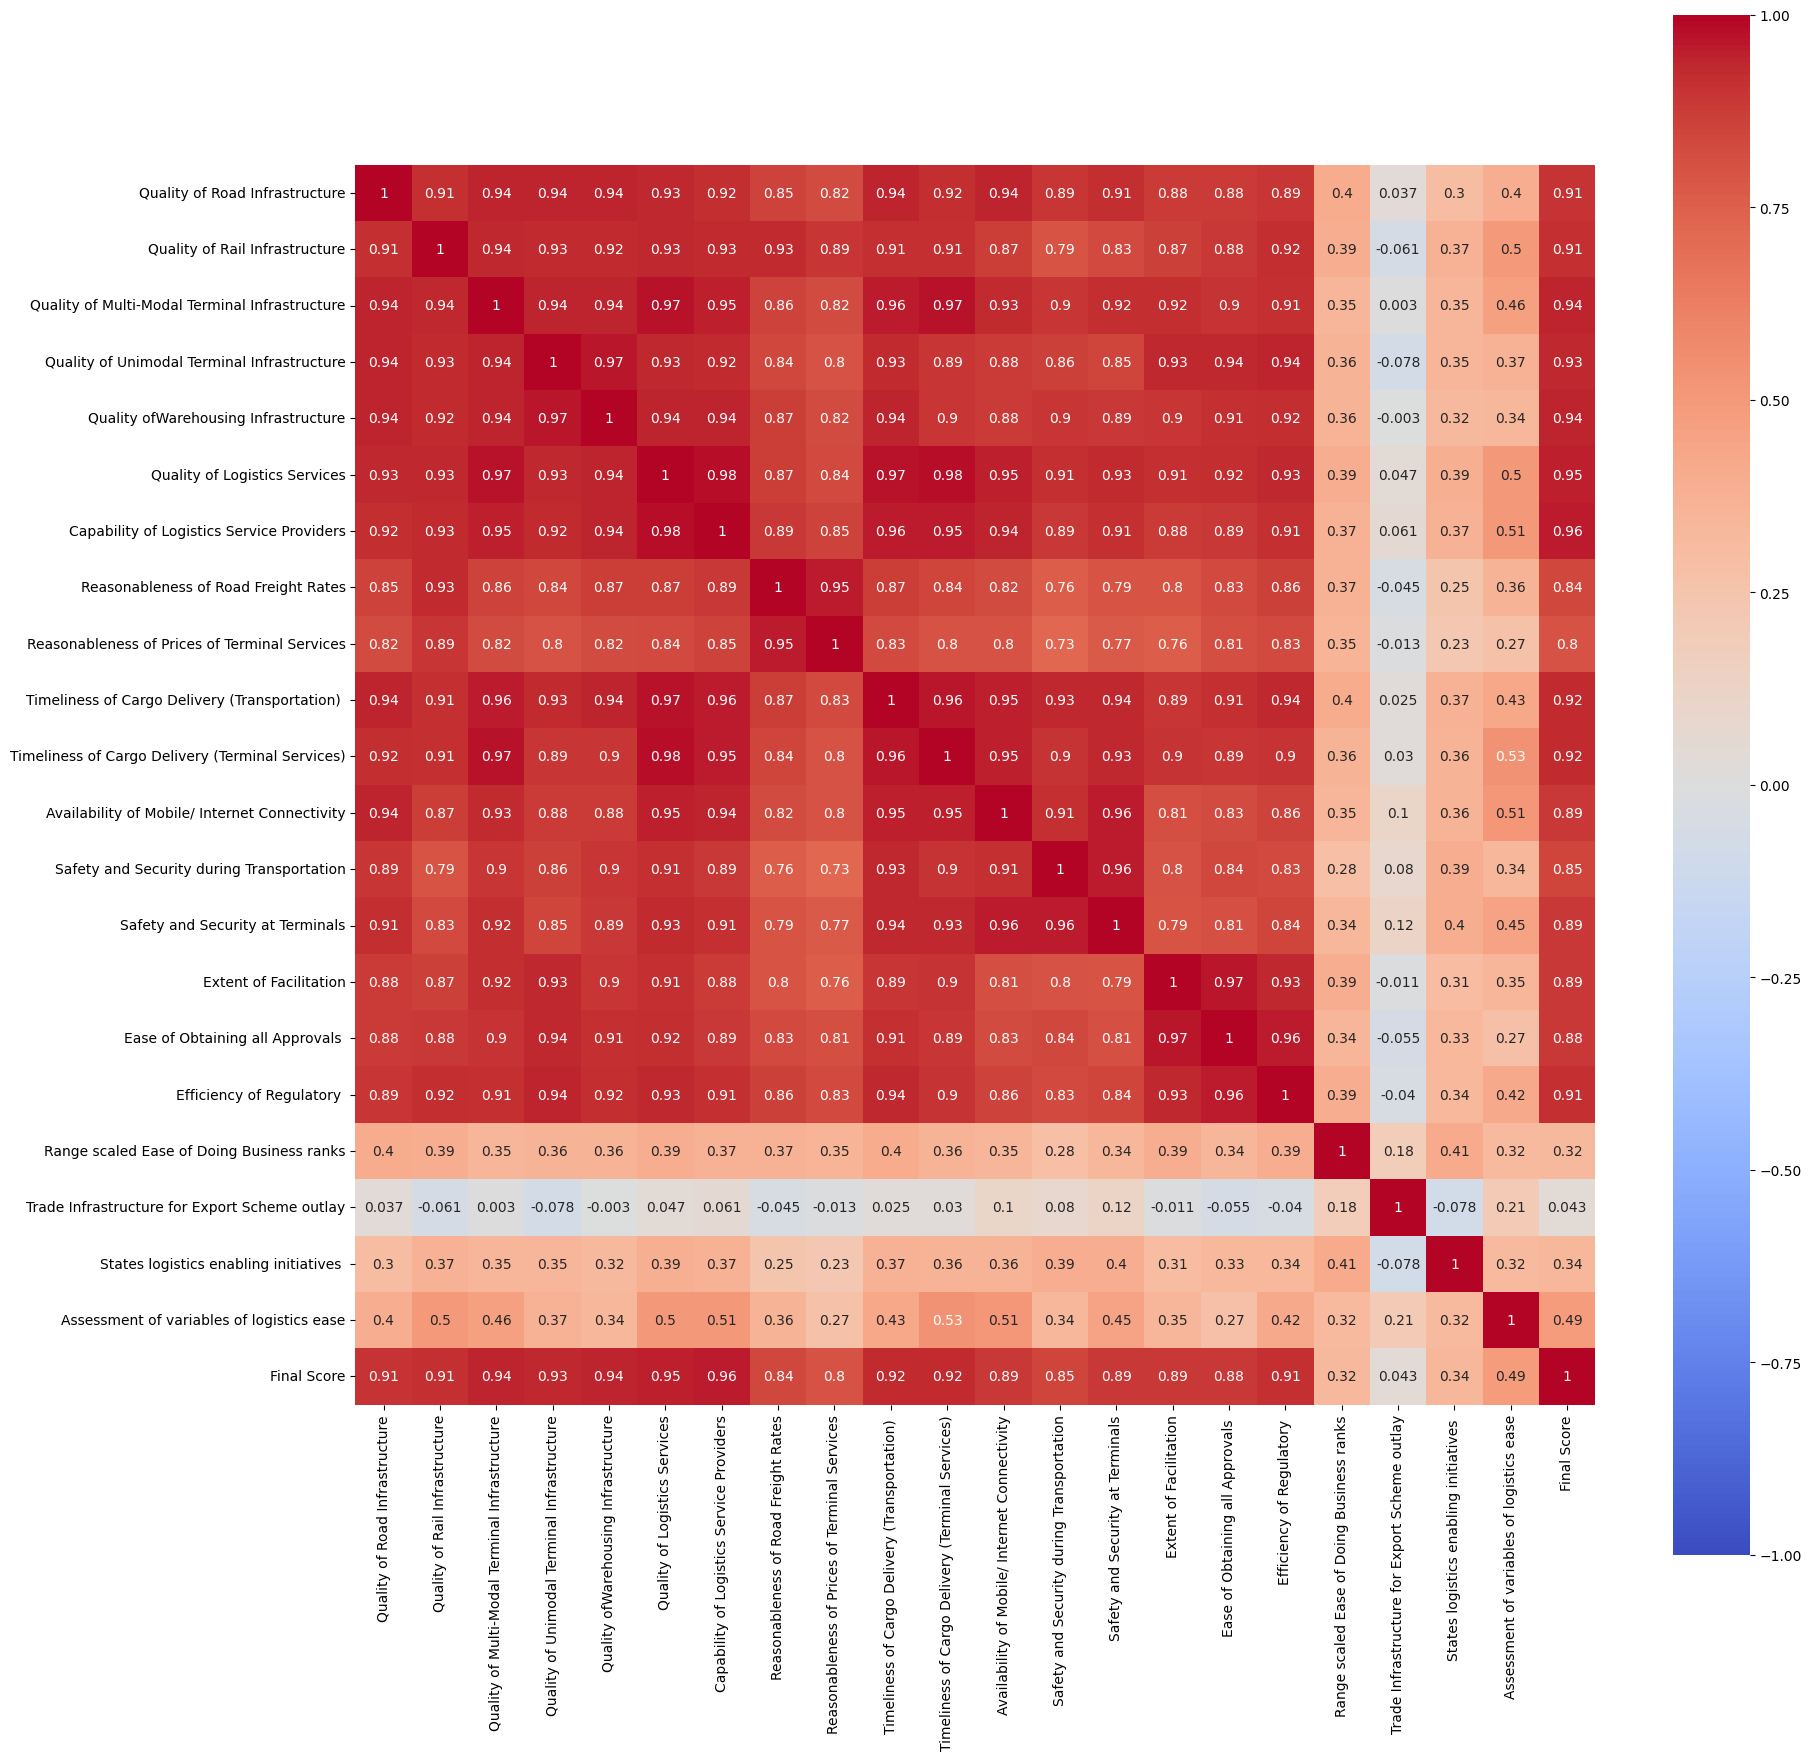

In [13]:
#Correlation analysis
plt.figure(figsize=(20,20))
sns.heatmap(data.corr('pearson'),vmin=-1,vmax=1,cmap='coolwarm',square=True,annot=True)

In [14]:
df_corr = pd.DataFrame(data.corr().unstack().sort_values(ascending=False)['Final Score'],columns=['correlation to the target'])
df_corr.style.background_gradient(cmap=sns.light_palette('green',as_cmap=True))

,correlation to the target
Final Score,1.000000
Capability of Logistics Service Providers,0.955563
Quality of Logistics Services,0.952009
Quality ofWarehousing Infrastructure,0.943528
Quality of Multi-Modal Terminal Infrastructure,0.941291
Quality of Unimodal Terminal Infrastructure,0.929783
Timeliness of Cargo Delivery (Terminal Services),0.924051
Timeliness of Cargo Delivery (Transportation),0.923715
Quality of Rail Infrastructure,0.913035
Efficiency of Regulatory,0.911096


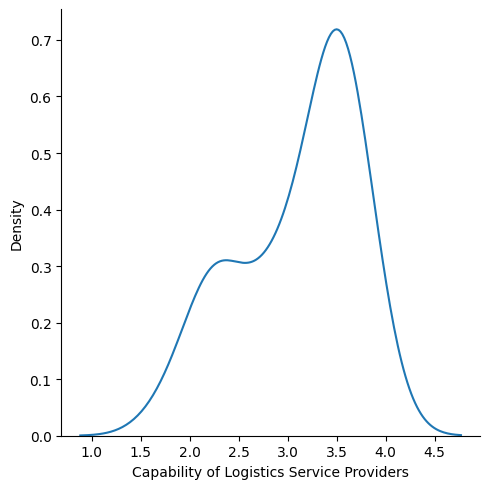

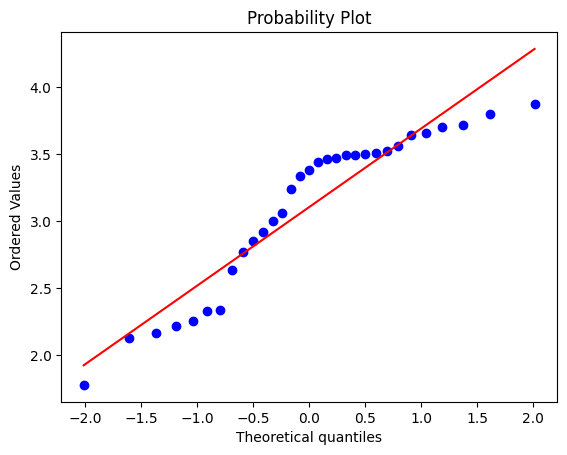

In [15]:
#Visualizations
sns.displot(data = data['Capability of Logistics Service Providers'], kind='kde', legend = True)
fig = plt.figure()
res = stats.probplot(data['Capability of Logistics Service Providers'], plot=plt)

In [16]:
X = data.loc[:, data.columns!='Final Score']

In [17]:
Y = data['Final Score']

In [18]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression()

In [19]:
print(regr.coef_)

[ 0.06228136 -0.08306383 -0.26023504  0.66579881  0.16001028 -0.11822529
  0.45238786 -0.16769224  0.14717245  0.06928848  0.61512444 -0.55014964
 -0.46083525  0.57285903 -0.19366347 -0.00387116 -0.00947911 -0.02814693
  0.02829732  0.00741716  0.01661457]


In [20]:
a = ('Quality of Road Infrastructure', 'Quality of Rail Infrastructure', 'Quality of Multi-Modal Terminal Infrastructure', 'Quality of Unimodal Terminal Infrastructure', 'Quality ofWarehousing Infrastructure', 'Quality of Logistics Services', 'Capability of Logistics Service Providers', 'Reasonableness of Road Freight Rates', 'Reasonableness of Prices of Terminal Services', 'Timeliness of Cargo Delivery (Transportation) ', 'Timeliness of Cargo Delivery (Terminal Services)', 'Availability of Mobile/ Internet Connectivity', 'Safety and Security during Transportation', 'Safety and Security at Terminals', 'Extent of Facilitation', 'Ease of Obtaining all Approvals ', 'Efficiency of Regulatory ', 'Range scaled Ease of Doing Business ranks', 'Trade Infrastructure for Export Scheme outlay', 'States logistics enabling initiatives ', 'Assessment of variables of logistics ease')
b = [ 0.06228136, -0.08306383, -0.26023504,  0.66579881,  0.16001028, -0.11822529, 0.45238786, -0.16769224,  0.14717245,  0.06928848,  0.61512444, -0.55014964, -0.46083525,  0.57285903, -0.19366347, -0.00387116, -0.00947911, -0.02814693, 0.02829732, 0.00741716,  0.01661457]

x = {a[i]: [b[i]] for i in range(len(a))}
df = pd.DataFrame.from_dict(x)

In [21]:
df.transpose()

,0
Quality of Road Infrastructure,0.062281
Quality of Rail Infrastructure,-0.083064
Quality of Multi-Modal Terminal Infrastructure,-0.260235
Quality of Unimodal Terminal Infrastructure,0.665799
Quality ofWarehousing Infrastructure,0.160010
Quality of Logistics Services,-0.118225
Capability of Logistics Service Providers,0.452388
Reasonableness of Road Freight Rates,-0.167692
Reasonableness of Prices of Terminal Services,0.147172
Timeliness of Cargo Delivery (Transportation),0.069288
